<a href="https://colab.research.google.com/github/afraz-rupak/Bangla_Chatbot_Bert_Finetuning_with_Question_Answer/blob/main/Part1_Bangla_Chatbot_using_Bert_Finetuning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#installing the transformers library
!pip install transformers
!pip install nltk
!pip install banglanltk
!pip install bltk
!pip install -U bnlp_toolkit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 10.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_path = "/content/drive/MyDrive/Colab Notebooks/Combind_final_2.csv"

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(df_path)
df

,Category,questions,answers,tags
0,একাডেমিক গাইডলাইন্স,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার,"['ভর্তি','সেমিস্টার']"
1,একাডেমিক গাইডলাইন্স,এক বছরে কয়টা সেমিস্টার?,দুইটা,"['ভর্তি','সেমিস্টার']"
2,একাডেমিক গাইডলাইন্স,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,['সেমিস্টার']
3,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি,['সেমিস্টার']
4,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন,['সেমিস্টার']
...,...,...,...,...
3670,ওয়েভার ফর ডিপ্লোমা হোল্ডার,"বিকাশ, রকেটে দেয়া যাবে?",হ্যা,"['বিকাশ','রকেট']"
3671,ওয়েভার ফর ডিপ্লোমা হোল্ডার,অনলাইনে টাকা দিলে কি এক্সট্রা চার্জ কাটে?,হ্যা,"['অনলাইন','চার্জ']"
3672,ওয়েভার ফর ডিপ্লোমা হোল্ডার,প্রতি সেমিস্টারে কি ওয়েভার এর আবেদন করতে হবে?,না,"['সেমিস্টার','ওয়েভার']"
3673,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সব সিস্টেমেটিক্যালি হবে?,হ্যা,['ওয়েভার']


In [6]:
df = df.drop(['Category'], axis=1)
df.head()

,questions,answers,tags
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার,"['ভর্তি','সেমিস্টার']"
1,এক বছরে কয়টা সেমিস্টার?,দুইটা,"['ভর্তি','সেমিস্টার']"
2,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,['সেমিস্টার']
3,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি,['সেমিস্টার']
4,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন,['সেমিস্টার']


In [7]:
from transformers import BertTokenizer, TFBertModel
mbert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
mbert_model = TFBertModel.from_pretrained("bert-base-multilingual-cased")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [8]:
#displaying biobert model summary
mbert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  177853440 
                                                                 
Total params: 177,853,440
Trainable params: 177,853,440
Non-trainable params: 0
_________________________________________________________________


**DataSet Creation**

In [9]:
df.isnull().sum()

questions    0
answers      0
tags         2
dtype: int64

In [10]:
df=df.dropna()

In [11]:
all_data=df

In [12]:
#displaying the Bangla ChatBot data.
all_data

,questions,answers,tags
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার,"['ভর্তি','সেমিস্টার']"
1,এক বছরে কয়টা সেমিস্টার?,দুইটা,"['ভর্তি','সেমিস্টার']"
2,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,['সেমিস্টার']
3,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি,['সেমিস্টার']
4,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন,['সেমিস্টার']
...,...,...,...
3670,"বিকাশ, রকেটে দেয়া যাবে?",হ্যা,"['বিকাশ','রকেট']"
3671,অনলাইনে টাকা দিলে কি এক্সট্রা চার্জ কাটে?,হ্যা,"['অনলাইন','চার্জ']"
3672,প্রতি সেমিস্টারে কি ওয়েভার এর আবেদন করতে হবে?,না,"['সেমিস্টার','ওয়েভার']"
3673,সব সিস্টেমেটিক্যালি হবে?,হ্যা,['ওয়েভার']


In [13]:
import re
import numpy as np
#function to preprocess tags post loading from disk
def preprocess_tags(tags):
  tags=tags[1:-1]
  tags=tags.replace("\'",'')
  return np.array(tags.split(', '))

In [14]:
#preprocessing the tags post loading from disk
all_data['tags']=all_data.tags.apply(lambda x: preprocess_tags(x))

In [15]:
#displaying the data
all_data.head()

,questions,answers,tags
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার,"[ভর্তি,সেমিস্টার]"
1,এক বছরে কয়টা সেমিস্টার?,দুইটা,"[ভর্তি,সেমিস্টার]"
2,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,[সেমিস্টার]
3,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি,[সেমিস্টার]
4,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন,[সেমিস্টার]


In [16]:
import re
#preprocessing questions and answers.
def decontractions(phrase):
    return phrase


def preprocess(text):
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text


all_data['preprocessed_question'] = all_data['questions'].apply(preprocess)
all_data['preprocessed_answer'] = all_data['answers'].apply(preprocess)
all_data.head()

,questions,answers,tags,preprocessed_question,preprocessed_answer
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার,"[ভর্তি,সেমিস্টার]",ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার,ছয় মাসের সেমিস্টার
1,এক বছরে কয়টা সেমিস্টার?,দুইটা,"[ভর্তি,সেমিস্টার]",এক বছরে কয়টা সেমিস্টার,দুইটা
2,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,[সেমিস্টার],সেমিস্টারের নাম কি কি,স্প্রিং ও ফল
3,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি,[সেমিস্টার],স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়,জানুয়ারি
4,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন,[সেমিস্টার],স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে,জুন


In [17]:
#finding the lens of preprocessed questions and answers
all_data['question_len']=all_data['preprocessed_question'].apply(lambda x: len(x.split(' ')))
all_data['answer_len']=all_data['preprocessed_answer'].apply(lambda x: len(x.split(' ')))

In [18]:
#printing different percentiles of question and answer lengths
import numpy as np
for i in range(0,101,10):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

0 1.0 1.0
10 4.0 1.0
20 5.0 1.0
30 6.0 2.0
40 7.0 2.0
50 7.0 4.0
60 8.0 5.0
70 9.0 7.0
80 11.0 11.0
90 13.0 15.0
100 38.0 160.0


In [19]:
#printing different percentiles of question and answer lengths
for i in range(90,101,1):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

90 13.0 15.0
91 14.0 17.0
92 14.0 19.0
93 14.0 21.960000000000036
94 15.0 26.0
95 16.0 28.0
96 17.0 29.11999999999989
97 18.83999999999969 31.0
98 21.0 33.0
99 24.0 39.279999999999745
100 38.0 160.0


In [20]:
#since more than 100% percent of questions and about 99% of all answers lie within 500 words, we use 500 as the max length
all_data['short_question']=all_data.apply(lambda x: ' '.join(x.preprocessed_question.split(' ')[:500]) if x.question_len>500 else x.preprocessed_question ,axis=1)
all_data['short_answer']=all_data.apply(lambda x: ' '.join(x.preprocessed_answer.split(' ')[:500]) if x.answer_len>500 else x.preprocessed_answer ,axis=1)

In [21]:
#displaying the data post truncating the question and answers to length of 500
all_data.head(5)

,questions,answers,tags,preprocessed_question,preprocessed_answer,question_len,answer_len,short_question,short_answer
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার,"[ভর্তি,সেমিস্টার]",ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার,ছয় মাসের সেমিস্টার,5,3,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার,ছয় মাসের সেমিস্টার
1,এক বছরে কয়টা সেমিস্টার?,দুইটা,"[ভর্তি,সেমিস্টার]",এক বছরে কয়টা সেমিস্টার,দুইটা,4,1,এক বছরে কয়টা সেমিস্টার,দুইটা
2,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,[সেমিস্টার],সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,4,3,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল
3,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি,[সেমিস্টার],স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়,জানুয়ারি,7,1,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়,জানুয়ারি
4,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন,[সেমিস্টার],স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে,জুন,6,1,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে,জুন


In [22]:
#preparing the positive label dataset by taking the original question and original answer
all_dataset=all_data[['short_question','short_answer','tags']].copy()
all_dataset['label']=1.0

In [23]:
#displaying the positive labelled dataset
all_dataset.head(3)

,short_question,short_answer,tags,label
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার,ছয় মাসের সেমিস্টার,"[ভর্তি,সেমিস্টার]",1.0
1,এক বছরে কয়টা সেমিস্টার,দুইটা,"[ভর্তি,সেমিস্টার]",1.0
2,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল,[সেমিস্টার],1.0


In [24]:
#function to extract the negative samples using tags
def extract_negative_samples(question,tags):
  stop=False
  while (not stop):
    sample_row= all_dataset.sample()
    sample_tags=sample_row.tags.values[0]
    inter_tags=set(tags[0]).intersection(set(sample_tags))
    if len(inter_tags)==0:
      stop=True
  return sample_row

In [25]:
#preparing the negative labelled dataset
from tqdm.notebook import tqdm
tqdm.pandas()
negative_labels=all_dataset.progress_apply(lambda x: pd.Series([x.short_question,extract_negative_samples(x.short_question,x.tags).short_answer.values[0],x.tags]),axis=1)
negative_labels['label']=-1.0
negative_labels.columns=['short_question','short_answer','tags','label']

  0%|          | 0/3673 [00:00<?, ?it/s]

In [26]:
#displaying the negative labelled dataset
negative_labels

,short_question,short_answer,tags,label
0,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার,ঠিক আছে ভর্তি এখন চলছে। আমাদের স্থায়ী ক্যাম্প...,"[ভর্তি,সেমিস্টার]",-1.0
1,এক বছরে কয়টা সেমিস্টার,৪ বছর,"[ভর্তি,সেমিস্টার]",-1.0
2,সেমিস্টারের নাম কি কি,হ্যাঁ তারা ৫০ ছাড় পাবে যদি তারা এসজিপিএ ৩০০ ব...,[সেমিস্টার],-1.0
3,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়,না,[সেমিস্টার],-1.0
4,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে,গড় সেমিস্টারের ফি ৫৩০০০ টাকা,[সেমিস্টার],-1.0
...,...,...,...,...
3670,বিকাশ রকেটে দেয়া যাবে,১৪২৭৫০ ২৩২০০০ টাকা,"[বিকাশ,রকেট]",-1.0
3671,অনলাইনে টাকা দিলে কি এক্সট্রা চার্জ কাটে,সর্বনিম ৯ ক্রেডিটস নিতে হবে।,"[অনলাইন,চার্জ]",-1.0
3672,প্রতি সেমিস্টারে কি ওয়েভার এর আবেদন করতে হবে,diudc@daffodilvarsityedubd,"[সেমিস্টার,ওয়েভার]",-1.0
3673,সব সিস্টেমেটিক্যালি হবে,4,[ওয়েভার],-1.0


In [27]:
#concatenating the positive and negative labelled dataset to get the final labelled dataset.
all_data_with_labels=pd.concat([all_dataset,negative_labels],axis=0)
all_data_with_labels.shape

(7346, 4)

In [28]:
#splitting the data into train and validation
from sklearn.model_selection import train_test_split
train, validation = train_test_split(all_data_with_labels, test_size=0.2,random_state=42,shuffle=True,stratify=all_data_with_labels.label)

In [29]:
#saving train and validation data to disk
train.to_csv('train_data_chatbot.csv',index=False)
validation.to_csv('validation_data_chatbot.csv',index=False)

In [30]:
#loading train and validation data from disk
import pandas as pd
train=pd.read_csv('train_data_chatbot.csv')
validation=pd.read_csv('validation_data_chatbot.csv')

In [31]:
#displaying the train label counts
train.label.value_counts()

-1.0    2938
 1.0    2938
Name: label, dtype: int64

In [32]:
#displaying the validation label counts
validation.label.value_counts()

 1.0    735
-1.0    735
Name: label, dtype: int64

In [33]:
#displaying the train dataset
train.head(5)

,short_question,short_answer,tags,label
0,আন্তর্জাতিক শিক্ষার্থীদেরকে দেওয়া স্কলারশিপের ...,গড় সেমিস্টারের ফি ৪৫০০০ টাকা,['আন্তর্জাতিক শিক্ষার্থী' ' স্কলারশিপ'],-1.0
1,একটি বীমা পলিসিতে প্রতিদ্বন্দ্বিতার সময়কাল কী,কনটেস্টেবল পিরিয়ড সাধারণত ১ বা ২ বছর হয় যে স...,['বীমা'],1.0
2,মাল্টিমিডিয়া এন্ড ক্রিয়েটিভ টেকনোলজিতে প্রোগ্র...,হ্যাঁ আছে,['এমসিটি'],1.0
3,ইংরেজির জন্য সেমিস্টার সময়কাল,সেমিস্টারের সময়কাল ৪ মাস,"['ইংরেজি,বিভাগ,সেমিস্টার']",1.0
4,আমি কি বিবিএ প্রোগ্রামের জন্য কোনও বৃত্তি পেতে...,194,"['বিবিএ,প্রোগ্রাম,বৃত্তি']",-1.0


In [34]:
#extracting the short answers and questions from the train data
questions=train['short_question']
answers=train['short_answer']
labels=train['label']

In [35]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#Setting Max_length to be 512 as discussed above
MAX_LENGTH = 512
import tensorflow as tf


# Tokenize, filter and pad sentences
def tokenize_and_filter(questions, answers):
  tokenized_questions, tokenized_answers = [], []

  for (question, answer) in zip(questions, answers):
    # generating sequences
    tokenized_question =  mbert_tokenizer.encode(question)
    tokenized_answer = mbert_tokenizer.encode(answer)
    tokenized_questions.append(tokenized_question)
    tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=MAX_LENGTH, padding='post')
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=MAX_LENGTH, padding='post')

  return tokenized_questions, tokenized_answers

#tokenizing and padding the train questions and answers
questions, answers = tokenize_and_filter(questions, answers)

Token indices sequence length is longer than the specified maximum sequence length for this model (598 > 512). Running this sequence through the model will result in indexing errors


In [36]:
#preparing the question mask and the answer mask of the train dataset
train_question_mask=[[1 if token!=0 else 0 for token in question] for question in questions]
train_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in answers]

In [37]:
#extracting the short answers and questions from the validation data
val_questions=validation['short_question']
val_answers=validation['short_answer']
val_labels=validation['label']

In [38]:
#tokenizing and padding the validation question and answers
val_questions, val_answers = tokenize_and_filter(val_questions, val_answers)

In [39]:
#preparing the question and answer mask for the validation data
val_question_mask=[[1 if token!=0 else 0 for token in question] for question in val_questions]
val_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in val_answers]

In [40]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the training  dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': questions,
        'answer': answers,
        'question_mask':train_question_mask,
        'answer_mask':train_answer_mask
    },
    {
        'label': labels.values
    },
))

# dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE,drop_remainder=True)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [41]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the validation dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': val_questions,
        'answer': val_answers,
        'question_mask':val_question_mask,
        'answer_mask':val_answer_mask
    },
    {
        'label': val_labels.values
    },
))

val_dataset = val_dataset.cache()
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE,drop_remainder=True)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [42]:
#creating the ffn layer
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate,Conv1D,MaxPool1D,Dropout
class FFN(tf.keras.layers.Layer):
    def __init__(
            self,
            name='FFN',
            **kwargs):
        """Simple Dense wrapped with various layers
        """

        super(FFN, self).__init__(name=name, **kwargs)
        self.dropout = 0.2
        self.ffn_layer = tf.keras.layers.Dense(
            units=768,
            activation='relu',
            kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')


    def call(self, inputs):
        ffn_embedding = self.ffn_layer(inputs)
        ffn_embedding = tf.keras.layers.Dropout(
            self.dropout)(ffn_embedding)
        ffn_embedding += inputs
        return ffn_embedding

In [43]:
#displaying the biobert model summary
mbert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  177853440 
                                                                 
Total params: 177,853,440
Trainable params: 177,853,440
Non-trainable params: 0
_________________________________________________________________


In [44]:
#creating the mbert model for Bangla chatbot
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
class BanglaQAModelwithBert(tf.keras.Model):
    def __init__(
            self,
            trainable=False,
            name=''):
        super(BanglaQAModelwithBert, self).__init__(name=name)

        self.q_ffn_layer = FFN(name='q_ffn')
        self.a_ffn_layer = FFN(name='a_ffn')
        self.mbert_model=mbert_model
        self.mbert_model.trainable=trainable
        self.cos=tf.keras.layers.Dot(axes=1,normalize=True)

    def call(self, inputs):
      question_embeddings=self.mbert_model(input_ids=inputs['question'],attention_mask=inputs['question_mask']).pooler_output
      answer_embeddings=self.mbert_model(input_ids=inputs['answer'],attention_mask=inputs['answer_mask']).pooler_output
      q_ffnn=self.q_ffn_layer(question_embeddings)
      a_ffnn=self.a_ffn_layer(answer_embeddings)
      output=self.cos([q_ffnn,a_ffnn])
      return {"label":output}

In [45]:
#defining custom callback
class custom_callback(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'acc': []}

  def on_epoch_end(self, epoch, logs={}):
        self.history['acc'].append(logs.get('model_accuracy'))



        #saving the model if validation accuracy increased from previous epoch
        if  (epoch==0) or (logs.get('model_accuracy')>self.history['acc'][epoch-1]):
          self.model.save_weights('Bangla_bert_res'+str(epoch)+'/banglaBot'+str(epoch)+'_'+str(logs.get('model_accuracy')))


        is_nan_values=[]
        for i in self.model.get_weights():
          is_nan_values.append(np.isnan(i).any())

        #stopping the training if weights is nan or loss is nan or inf
        if (np.array(is_nan_values).any() or (tf.math.is_nan(logs.get('loss'))) or (np.isinf(logs.get('loss')))):
          self.model.stop_training = True


In [46]:
#defining the custom metric
batch_size=2
def model_accuracy(y_true,y_pred):
  y_true=tf.reshape(y_true,[tf.constant(batch_size)])
  y_pred=tf.reshape(y_pred,[tf.constant(batch_size)])
  c=tf.constant(0,dtype='float32')
  d=tf.cast(tf.math.greater_equal(y_true,c),dtype='float32')
  e=tf.cast(tf.math.greater_equal(y_pred,c),dtype='float32')
  f=tf.cast(tf.math.equal(d,e),dtype='float32')
  g=tf.reduce_sum(f)
  h=tf.cast(tf.shape(f),dtype='float32')
  i=g/h
  return i

In [47]:
#compiling and training the bangla chatbot model
import tensorflow.keras.backend as K
K.set_floatx('float32')
learning_rate=0.00001
num_epochs=5
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
bangla_qa_model=BanglaQAModelwithBert(trainable=True)
bangla_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[model_accuracy])

epochs = num_epochs

bangla_qa_model.fit(dataset,validation_data=val_dataset,epochs=epochs,callbacks=[custom_callback()])
bangla_qa_model.summary()

Epoch 1/5
2938/2938 [==============================] - 1647s 541ms/step - loss: 1.0027 - model_accuracy: 0.4959 - val_loss: 1.0001 - val_model_accuracy: 0.5000
Epoch 2/5
2938/2938 [==============================] - 1579s 537ms/step - loss: 1.0004 - model_accuracy: 0.4971 - val_loss: 1.0000 - val_model_accuracy: 0.5000
Epoch 3/5
2938/2938 [==============================] - 1559s 531ms/step - loss: 1.0002 - model_accuracy: 0.4964 - val_loss: 1.0000 - val_model_accuracy: 0.5000
Epoch 4/5
2938/2938 [==============================] - 1559s 531ms/step - loss: 1.0002 - model_accuracy: 0.4934 - val_loss: 1.0000 - val_model_accuracy: 0.5000
Epoch 5/5
2938/2938 [==============================] - 1568s 534ms/step - loss: 1.0001 - model_accuracy: 0.4973 - val_loss: 1.0000 - val_model_accuracy: 0.5000
Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_ffn (FFN)                 multiple                  590

**Evaluating the model with the best train accuracy**




In [49]:
import tensorflow.keras.backend as K
K.set_floatx('float32')
bangla_qa_model=BanglaQAModelwithBert(trainable=True)
bangla_qa_model.load_weights('/content/Bangla_bert_res4/banglaBot4_0.49727705121040344')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
bangla_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[model_accuracy])

# original_labels=[]
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(bangla_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])


  0%|          | 0/1470 [00:00<?, ?it/s]

1/1 [==============================] - 0s 148ms/step


In [50]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points
def acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and val_labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and val_labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)



In [51]:
#function to print the best accuracy and the threshold at which it is occuring
def best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [52]:
#find best threshold and accuracy of the model with best train accuracy on validation data
best_threshold_acc(predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.5
accuracy for threshold -0.9 is 0.5
accuracy for threshold -0.8 is 0.5
accuracy for threshold -0.7000000000000001 is 0.5
accuracy for threshold -0.6000000000000001 is 0.5
accuracy for threshold -0.5 is 0.5
accuracy for threshold -0.4 is 0.5
accuracy for threshold -0.30000000000000004 is 0.5
accuracy for threshold -0.2 is 0.5
accuracy for threshold -0.1 is 0.5
accuracy for threshold 0.0 is 0.5
accuracy for threshold 0.1 is 0.5
accuracy for threshold 0.2 is 0.5
accuracy for threshold 0.30000000000000004 is 0.5
accuracy for threshold 0.4 is 0.5
accuracy for threshold 0.5 is 0.5
accuracy for threshold 0.6000000000000001 is 0.5
accuracy for threshold 0.7000000000000001 is 0.5
accuracy for threshold 0.8 is 0.5
accuracy for threshold 0.9 is 0.5
accuracy for threshold 1.0 is 0.5
best accuracy is 0.5 at threshold -1.0


accuracy for threshold 0.2 is 0.5


<ipython-input-53-caf8ce0020fe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(correct_pred_pos)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
<ipython-input-53-caf8ce0020fe>:5: UserWarning: 

`distplot` is a deprecated function 

<Axes: ylabel='Density'>

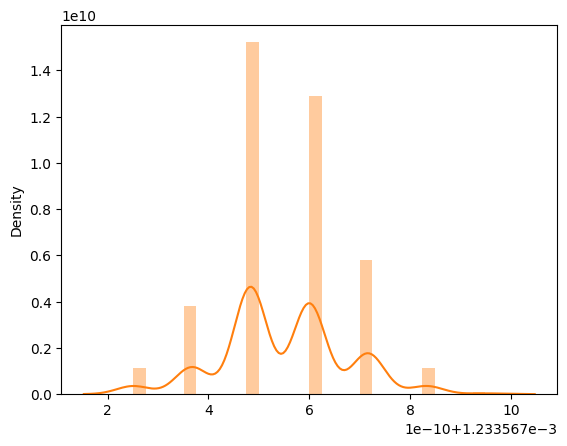

In [53]:
#displaying the pdf of correctly predicted positive and negative points
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.2)
sns.distplot(correct_pred_pos)
sns.distplot(correct_pred_neg)

**Evaluating the model with best validation accuracy**


In [54]:
#evaluating the model on validation data
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np
K.set_floatx('float32')
bangla_qa_model=BanglaQAModelwithBert(trainable=False)
bangla_qa_model.load_weights('/content/Bangla_bert_res4/banglaBot4_0.49727705121040344')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(bangla_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])


  0%|          | 0/1470 [00:00<?, ?it/s]

1/1 [==============================] - 0s 147ms/step


In [55]:
#finding the best accuracy and the corresponding threshold of the model of best validation accuracy
best_threshold_acc(predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.5
accuracy for threshold -0.9 is 0.5
accuracy for threshold -0.8 is 0.5
accuracy for threshold -0.7000000000000001 is 0.5
accuracy for threshold -0.6000000000000001 is 0.5
accuracy for threshold -0.5 is 0.5
accuracy for threshold -0.4 is 0.5
accuracy for threshold -0.30000000000000004 is 0.5
accuracy for threshold -0.2 is 0.5
accuracy for threshold -0.1 is 0.5
accuracy for threshold 0.0 is 0.5
accuracy for threshold 0.1 is 0.5
accuracy for threshold 0.2 is 0.5
accuracy for threshold 0.30000000000000004 is 0.5
accuracy for threshold 0.4 is 0.5
accuracy for threshold 0.5 is 0.5
accuracy for threshold 0.6000000000000001 is 0.5
accuracy for threshold 0.7000000000000001 is 0.5
accuracy for threshold 0.8 is 0.5
accuracy for threshold 0.9 is 0.5
accuracy for threshold 1.0 is 0.5
best accuracy is 0.5 at threshold -1.0


In [56]:
train_predicted_labels=[]
for i in tqdm(range(len(questions))):
  train_predicted_labels.append(bangla_qa_model.predict({'question':np.array([questions[i]]),'question_mask':np.array([train_question_mask[i]]),
                             'answer':np.array([answers[i]]),'answer_mask':np.array([train_answer_mask[i]])})['label'][0][0])


  0%|          | 0/5876 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 114ms/step


In [57]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points for train data
def train_acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)



In [58]:
#function to print the best accuracy and the threshold at which it is occuring for train points
def train_best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(train_acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [59]:
train_best_threshold_acc(train_predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.5
accuracy for threshold -0.9 is 0.5
accuracy for threshold -0.8 is 0.5
accuracy for threshold -0.7000000000000001 is 0.5
accuracy for threshold -0.6000000000000001 is 0.5
accuracy for threshold -0.5 is 0.5
accuracy for threshold -0.4 is 0.5
accuracy for threshold -0.30000000000000004 is 0.5
accuracy for threshold -0.2 is 0.5
accuracy for threshold -0.1 is 0.5
accuracy for threshold 0.0 is 0.5
accuracy for threshold 0.1 is 0.5
accuracy for threshold 0.2 is 0.5
accuracy for threshold 0.30000000000000004 is 0.5
accuracy for threshold 0.4 is 0.5
accuracy for threshold 0.5 is 0.5
accuracy for threshold 0.6000000000000001 is 0.5
accuracy for threshold 0.7000000000000001 is 0.5
accuracy for threshold 0.8 is 0.5
accuracy for threshold 0.9 is 0.5
accuracy for threshold 1.0 is 0.5
best accuracy is 0.5 at threshold -1.0


accuracy for threshold 0.3 is 0.5


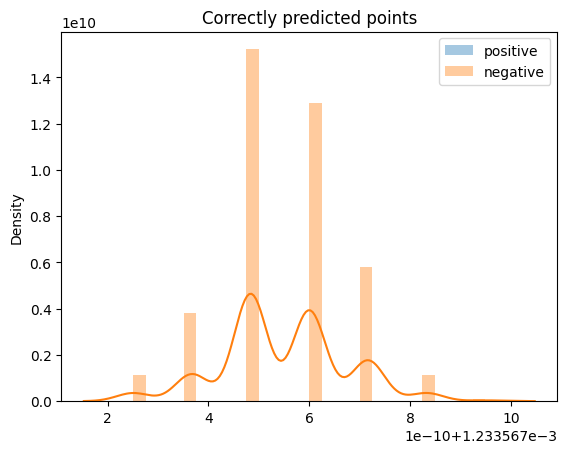

In [60]:
#plotting the pdf of correctly predicted positive and negative points
import matplotlib.pyplot as plt
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.3)
sns.distplot(correct_pred_pos,label='positive')
sns.distplot(correct_pred_neg,label='negative')
plt.title('Correctly predicted points')
plt.legend()
plt.show()


In [61]:
#finding incorrectly predicted positive and negative points
incorrect_pos=[]
incorrect_neg=[]
for i in range(len(val_labels)):
  if val_labels[i]==1 and predicted_labels[i]<0.3:
    incorrect_pos.append(predicted_labels[i])
  elif val_labels[i]==-1 and predicted_labels[i]>=0.3:
    incorrect_neg.append(predicted_labels[i])

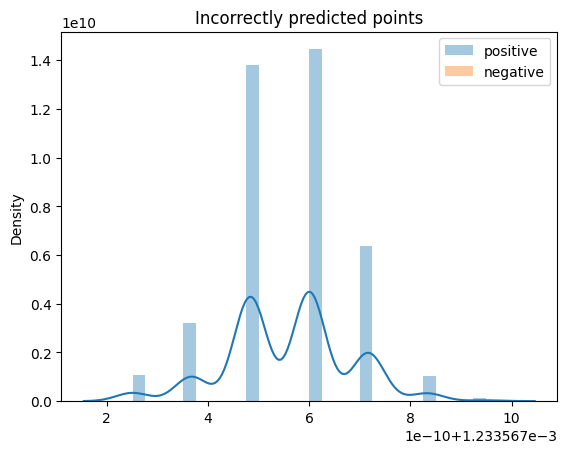

In [62]:
#plotting the pdf of model predicted similarities for incorrectly predicted positive and negative points
sns.distplot(incorrect_pos,label='positive')
sns.distplot(incorrect_neg,label='negative')
plt.title('Incorrectly predicted points')
plt.legend()
plt.show()

**Embedding extraction using the model**

In [63]:
#loading the trained Bangla QA chatbot for bert model from above checkpoint
bangla_qa_model=BanglaQAModelwithBert(trainable=True)
bangla_qa_model.load_weights('/content/Bangla_bert_res4/banglaBot4_0.49727705121040344')

In [64]:
#defining the question extractor model
x1=tf.keras.layers.Input((512),name='question',dtype='int64')
x2=tf.keras.layers.Input((512),name='question_mask',dtype='int64')
q_embed=bangla_qa_model.get_layer('q_ffn')(bangla_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
question_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=q_embed)

In [65]:
#saving the question extractor model to disk
question_extractor_model.save('question_extractor_model_2_11')

In [66]:
#loading the question extractor model from disk
question_extractor_model=tf.keras.models.load_model('question_extractor_model_2_11')

In [67]:
#function to extract embeddings given a question and a question mask
def question_extractor(sam_dict):
  q_embed=question_extractor_model({'question':sam_dict['question'],'question_mask':sam_dict['question_mask']})
  return q_embed


In [68]:
#defining function to extract question embeddings given question
def extract_question_embed(question):
  max_length=512
  tokenized_questions=[]
  tokenized_question =  mbert_tokenizer.encode(question)
  tokenized_questions.append(tokenized_question)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_questions]
  return question_extractor({'question':np.array(tokenized_questions),'question_mask':np.array(attention_mask)})

In [69]:
#defining the answer extractor model
x1=tf.keras.layers.Input((512),name='answer',dtype='int64')
x2=tf.keras.layers.Input((512),name='answer_mask',dtype='int64')
a_embed=bangla_qa_model.get_layer('a_ffn')(bangla_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
answer_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=a_embed)

In [70]:
#saving the answer extractor model to disk
answer_extractor_model.save('answer_extractor_model_2_13')

In [71]:
#loading the answer extractor model from disk
answer_extractor_model=tf.keras.models.load_model('answer_extractor_model_2_13')

In [72]:
#function to extract embeddings given an answer and an answer mask
def answer_extractor(sam_dict):
  a_embed=answer_extractor_model({'answer':sam_dict['answer'],'answer_mask':sam_dict['answer_mask']})
  return a_embed


In [73]:
#defining function to extract answer embeddings
def extract_answer_embed(answer):
  max_length=512
  tokenized_answers=[]
  tokenized_answer =  mbert_tokenizer.encode(answer)
  tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_answers]
  return answer_extractor({'answer':np.array(tokenized_answers),'answer_mask':np.array(attention_mask)})

In [74]:
#extracting the original(without negative sampling) train dataset
pos_train=train[train.label==1.0].copy()
pos_train.shape

(2938, 4)

In [75]:
#extracting the original(without negative sampling) validation dataset
pos_validation=validation[validation.label==1.0].copy()
pos_validation.shape

(735, 4)

In [76]:
#extracting the question embeddings of train data
from tqdm.notebook import tqdm
tqdm.pandas()
pos_train['short_question_embed']=pos_train.short_question.progress_apply(lambda x: extract_question_embed(x))

  0%|          | 0/2938 [00:00<?, ?it/s]

In [77]:
#extracting the question embeddings of validation data
pos_validation['short_question_embed']=pos_validation.short_question.progress_apply(lambda x: extract_question_embed(x))

  0%|          | 0/735 [00:00<?, ?it/s]

In [78]:
#extracting the answer embeddings of train data
pos_train['short_answer_embed']=pos_train.short_answer.progress_apply(lambda x: extract_answer_embed(x))

  0%|          | 0/2938 [00:00<?, ?it/s]

In [79]:
#extracting the answer embeddings of validation data
pos_validation['short_answer_embed']=pos_validation.short_answer.progress_apply(lambda x: extract_answer_embed(x))

  0%|          | 0/735 [00:00<?, ?it/s]

In [80]:
#converting embeddings from tensors to numpy arrays
pos_train['short_answer_embed_numpy']=pos_train.short_answer_embed.apply(lambda x: x.numpy() )
pos_train['short_question_embed_numpy']=pos_train.short_question_embed.apply(lambda x: x.numpy())

In [81]:
#converting embeddings from tensors to numpy arrays
pos_validation['short_answer_embed_numpy']=pos_validation.short_answer_embed.apply(lambda x: x.numpy() )
pos_validation['short_question_embed_numpy']=pos_validation.short_question_embed.apply(lambda x: x.numpy())

In [82]:
#Saving train question and answer embeddings to disk
pos_train.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_train_embeds.csv',index=False)

In [83]:
#saving validation question and answer embeddings to disk
pos_validation.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_validation_embeds.csv',index=False)

In this notebook,we have finetuned a pre-trained mbert model to extract embeddings for DIU admission question and answers. In the next notebook we will use these embeddings to retrieve similar question and answer to answer the question asked by a patient.